# ENGR 019 Lab 1: Estimating $\pi$

#  Monte Carlo Method

In [84]:
import numpy as np
import math

def mcpi(n):
    if n < 1: #make sure the user is giving us at least one dart
        return "Please input an integer greater than zero"
    
    counter = 0.0 #set a counter to zero (float) to start counting how many darts are inside the unit circle
    for i in range (1,n): #every time we throw a dart, we generate a new random set of coordinates
        x_rand = np.random.random_sample() #this will give us x coordinate of dart, uniformly distributed across [0,1)
        y_rand = np.random.random_sample() #this will give us y coordinate of dart, uniformly distributed across [0,1)

        if ((x_rand**2)+(y_rand**2)) < 1: #condition to be inside the unit circle
            counter += 1 #increase the counter by one if the condition is met

    pi = 4*(counter/n) #estimate pi using the formula in the lab instructions
    return pi

for k in range(1,10000): #we keep on trying larger numbers until we get a pi estimate that is accurate enough
    num = mcpi(k) #estimate pi using algorithm above
    min_num = k #at every iteration, update minimum number needed to reach desired accuracy level
    if int(num * 10000)/10000.0 == 3.1415: #if our number has the first 4 digits (after the decimal dot) coinciding with pi's, then we stop the loop
         break

print num #sanity check: make sure we actually reached the goal
print int(num * 10000)/10000.0 #sanity check: make sure our truncating expression is not messing things up
print min_num #minimum number of darts needed to extimate pi to its fourth digit

3.14157973174
3.1415
671


## Approach for Monte Carlo Method:

First, I implemented the $mcpi(n)$ function to estimate the value of $\pi$ based on how many uniformly randomly generated darts, thrown at the unit square, ended up inside the unit circle. I did this by uniformly randomly generating values for the $x$ and $y$ coordinates using the function $np.random.random\_sample()$ and then checking if the point with those coordinates was inside the unit circle or not, adding $1$ to a counter each time if it did. After I made sure the function was working properly, I started trying out values for $n$, using ranges starting at $1$ until $10$, $100$, $1,000$, and so on. I found that the program gave me accurate values of $\pi$ most of the time, up to the fourth digit, when I allowed for a range of higher than $1,000$. I ended up using a range of $10,000$ just to give myself more room for potential outliers where mcpi(n) didn't reach an accurate to the $4$th digit estimate until long after $1,000$.

My results for estimates of $\pi$ from the $10$ trials are:

| Trial | Estimate of $\pi$ |
|-------|-------------------|
|   1   |         671       |
|   2   |         904       |
|   3   |        1081       |
|   4   |         438       |
|   5   |         219       |
|   6   |        1575       |
|   7   |         424       |
|   8   |        2670       |
|   9   |        1286       |
|  10   |         671       |

Interestingly enough, the first and last trials gave back the same result. The average number of darts needed to be thrown in order to get $\pi$ accurate to the fourth digit after the decimal dot was $993.9$.

# Integration by Riemann Sums

Estimations: 
3.30451832625
3.1782685111
3.16041703178
3.145487477
3.14355546691
3.14198932743
Errors: 
0.162925672659
0.0366758575087
0.0188243781893
0.00389482341234
0.00196281332123
0.000396673840792


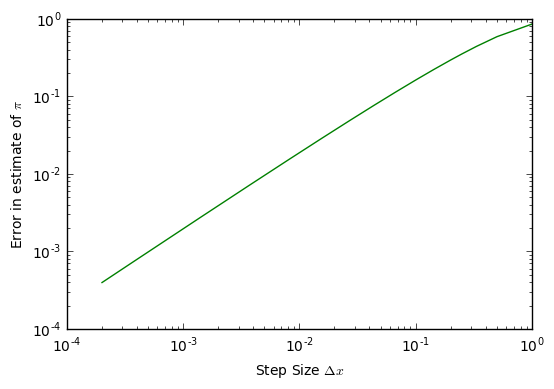

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import math

def intpi(n):
    if n < 1: #make sure the user is giving us at least one summation factor, otherwise it doesn't contribute to the summation
        return 0
    
    del_x = 1.0/n #step size for approximating the integral (the 1 is a float to allow for decimal division)
    summ = 0.0 #initialize summation variable to store f(x_i) as i grows
    for i in range(0, n): #we use this "for" loop to obtain the summation factor
        x_i = del_x * i #defintion of x_i
        summ += math.sqrt(1-x_i**2) #in every iteration, add the current value of f(x_i) to the summation
    integ = del_x * summ #formula for the approximation of the integral
    
    pi = 4 * integ #formula to approximate pi using the given formula
    return pi

print "Estimations: " #we print out all the values for the requested step sizes
print intpi(10)
print intpi(50)
print intpi(100)
print intpi(500)
print intpi(1000)
print intpi(5000)
print "Errors: " #we also print out all the values for the errors
print math.fabs(np.pi-intpi(10))
print math.fabs(np.pi-intpi(50))
print math.fabs(np.pi-intpi(100))
print math.fabs(np.pi-intpi(500))
print math.fabs(np.pi-intpi(1000))
print math.fabs(np.pi-intpi(5000))

step_size = [] #compute the values for x-axis of plot and put them in an array
for i in range(1,5000):
    step_size.append(1.0/i)

errors = []
for i in range(1,5000): #compute the values for y-axis of plot and put them in an array
    errors.append(math.fabs(np.pi-intpi(i)))

plt.figure()
plt.loglog(step_size,errors, '-g') #plotting using a log-log plot
plt.xlabel('Step Size $\Delta x$')
plt.ylabel('Error in estimate of $\pi$')
plt.show()

## Approach for Integration by Riemann Sums:

We computed the integral using the given formula. First, we calculated the value of the summation factor for the given $n$ using a "for" loop and the formula $f(x) = \sqrt{1-x_i^2}$, and then we simply put that summation factor into the formula for the integral $\int_{0}^{1} f(x) dx$. Afterwards, we proceeded to print out all the values of $intpi(n)$ for the requested $n$ values. Lastly, we created two arrays to store the values of the $x$ and $y$ axis of the log-log plot, and proceeded to plot the graph.

Our results for estimates of $\pi$ from the requested step sizes were:

|    n   | Estimate of $\pi$ |      Error      |
|--------|-------------------|-----------------|
|10      |3.30451832625      |0.162925672659   |
|50      |3.1782685111       |0.0366758575087  |
|100     |3.16041703178      |0.0188243781893  |
|500     |3.145487477        |0.00389482341234 |
|1000    |3.14355546691      |0.00196281332123 |
|5000    |3.14198932743      |0.000396673840792|

The graph shows us that, the smaller the step size $\Delta x$, the smaller the error in the estimation of $\pi$  is.

# Taylor Series

Estimations with tspi1(n): 
4.0
2.66666666667
3.46666666667
2.89523809524
3.33968253968
2.97604617605
3.28373848374
3.01707181707
3.25236593472
3.04183961893
3.23231580941
3.05840276593
3.21840276593
3.07025461778
3.20818565226
3.0791533942
3.20036551541
3.08607980112
3.19418790923
3.09162380667
Errors with with tspi1(n): 
0.85840734641
0.474925986923
0.325074013077
0.246354558352
0.198089886093
0.165546477544
0.142145830149
0.124520836518
0.110773281129
0.0997530346604
0.0907231558158
0.0831898876625
0.0768101123375
0.0713380358106
0.0665929986722
0.0624392593924
0.0587728618198
0.055512852466
0.0525952556421
0.049968846922
Estimations with tspi2(n): 
3.18326359833
3.14059702933
3.14162102933
3.14159177218
3.1415926824
3.14159265262
3.14159265362
3.14159265359
3.14159265359
3.14159265359
3.14159265359
3.14159265359
3.14159265359
3.14159265359
3.14159265359
3.14159265359
3.14159265359
3.14159265359
3.14159265359
3.14159265359
Errors with with tspi2(n): 
0.0416709447366
0.00099562426373

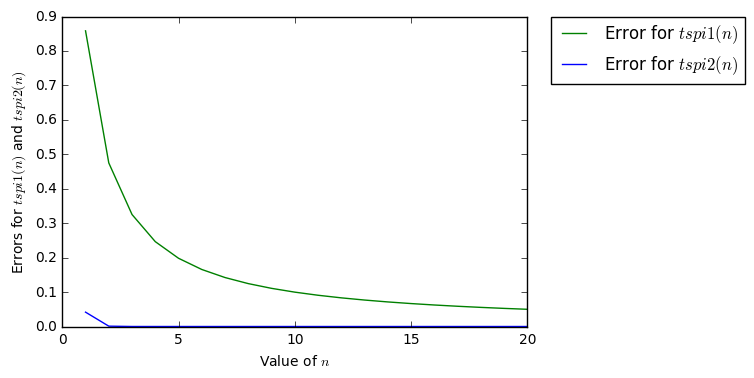

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import math

def arct(x,n): #define the arctan funciton in terms of the input and the number of terms from the Taylor approximation to be used
    arct = 0 #initialize arctan variable to store the final sum
    for i in range(1, n+1):
        arct += (-1)**(i-1) * float(x**(2*i-1))/float(2*i-1) #add more terms of the Taylor sequence as n gets larger with each iteration
    return arct

def tspi1(n):
    pi = 4 * arct(1.0,n) #formula using the Maclaurin Series
    return pi

def tspi2(n):
    pi = 16 * arct(1.0/5.0,n) - 4 * arct(1.0/239.0,n) #formula using the Maclaurin Series given the Machin Formula
    return pi

print "Estimations with tspi1(n): " #we print out all the values for the requested numbers of Taylor Series terms for tspi1(n)
for i in range(1, 21):
    print tspi1(i)
print "Errors with with tspi1(n): " #we also print out all the values for the errors
for i in range(1, 21):
    print math.fabs(np.pi-tspi1(i))

print "Estimations with tspi2(n): " #we print out all the values for the requested numbers of Taylor Series terms for tspi2(n)
for i in range(1, 21):
    print tspi2(i)
print "Errors with with tspi2(n): " #we also print out all the values for the errors
for i in range(1, 21):
    print math.fabs(np.pi-tspi2(i))

errors1 = [] #initialize array to contain values of tspi1(n) for n=1 to n=20
for i in range(1,21): #compute the errors for the tspi1(n) function
    errors1.append(math.fabs(np.pi-tspi1(i))) #add current value of tspi1(n) to the array
    
errors2 = [] #initialize array to contain values of tspi2(n) for n=1 to n=20
for i in range(1,21): #compute the errors for the tspi2(n) function
    errors2.append(math.fabs(np.pi-tspi2(i))) #add current value of tspi2(n) to the array

plt.figure()
plt.plot(range(1, 21), errors1, '-g', label="Error for $tspi1(n)$")
plt.plot(range(1, 21), errors2, '-b', label="Error for $tspi2(n)$")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Value of $n$')
plt.ylabel('Errors for $tspi1(n)$ and $tspi2(n)$')
plt.show()

## Approach for Taylor Series

First, we write our own arctan function that enables us to not only to compute the value of arctan at a single point, but also specify the degree of accuracy of our approximation by telling it how many terms of the Taylor series to use. Then we proceed to define the functions for both versions of the $\pi$ approximating formula and use them to print out the values they give from $n=1$ to $n=20$ and the respective values. Lastly, as before, we create arrays to store the error values for ease of plotting, and we proceed to plot the graphs of the errors of the two functions in one plot.

The plot really help us understand why the second formula is better. The Machin formula is more accurate than the initial formula because at every value of $n$, it has a much smaller error. Also, the error function for it converges to zero much faster than the error function for initial formula.